In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('./fashion-mnist_test.csv')
x = data.values
X = x[:,1:]
y = x[:,0]

X = X/255.0    ## Normalizing the data

print(X.shape,y.shape)

(10000, 784) (10000,)


In [3]:
## splitting the training and testing data

X_train = X[:8000,:]
y_train = y[:8000]

X_test = X[8000:,:]
y_test = y[8000:]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


In [4]:
classes = np.unique(y)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
Input_layer = 784                    ## clearly there are 784 features for each example
H1_size = 256                        ## 1st hidden layer
H2_size = 64                         ## 2nd hidden layer
Out = 10                             ## there are 10 unique classes to be predicted

Batch_size = 200                     ## contains this many at once from the data
Epoch = 50                           ## for every data the is trained this many times
LR = 0.0001                          ## learning rate

In [6]:
## initialising the weights and biases randomly

def __init__():
    
    np.random.seed(0)
    model = {}
    
    model["w1"] = np.random.randn(Input_layer,H1_size)/np.sqrt(Input_layer)  ## thumb rule to divide by sqrt of col size
    model["b1"] = np.zeros((1,H1_size))
    model["w2"] = np.random.randn(H1_size,H2_size)/np.sqrt(H1_size)
    model["b2"] = np.zeros((1,H2_size)) 
    model["w3"] = np.random.randn(H2_size,Out)/np.sqrt(H2_size)
    model["b3"] = np.zeros((1,Out))    
    
    return model

In [7]:
def forward_prop(model,X):
    
    z1 = X.dot(model["w1"]) + model["b1"]
    a1 = np.tanh(z1)
    z2 = a1.dot(model["w2"]) + model["b2"]
    a2 = np.tanh(z2)
    z3 = a2.dot(model["w3"]) + model["b3"]
    
    ## taking softmax of the z3
    h_x = np.exp(z3)
    y_out = h_x/ np.sum(h_x, axis=1, keepdims=True)  ## summing vals along the column
    
    return a1,a2,y_out

In [8]:
def back_prop(model, x, a1, a2, y_out, y_act):     ## in one-hot encoding already
    
    delta3 = y_out
    delta3[range(y_act.shape[0]), y_act] -= 1      
    dw3 = (a2.T).dot(delta3)
    db3 = np.sum(delta3, axis=0)
    delta2 = (1-np.square(a2))*delta3.dot(model["w3"].T)
    dw2 = (a1.T).dot(delta2)
    db2 = np.sum(delta2, axis=0)
    delta1 = (1-np.square(a1))*delta2.dot(model["w2"].T)
    dw1 = (x.T).dot(delta1)
    db1 = np.sum(delta1, axis=0)
    
    model["w3"] -= LR*dw3
    model["b3"] -= LR*db3
    model["w2"] -= LR*dw2
    model["b2"] -= LR*db2
    model["w1"] -= LR*dw1
    model["b1"] -= LR*db1
    
    return model

In [9]:
def loss(model, y_pred, y_act):
    
    l = -np.log(y_pred[range(y_act.shape[0]),y_act])
    loss = np.sum(l)
    
    return (1.0/y_pred.shape[0])*loss

In [10]:
def predict(y_out):
    
    return np.argmax(y_out,axis=1)

In [11]:
def accuracy(y_pred,y_act):
    
    return(100*np.sum(y_pred==y_act)/y_act.shape[0])

In [16]:
def main():
    
    training_loss = []
    val_loss = []
    val_acc = []
    model = __init__()
    
    for e in range(Epoch):
        
        print("\n epoch:%d"%(e+1))
        count = 0
        
        while(count + Batch_size < y_train.shape[0]):
            
            Batch_data = X_train[count : count+Batch_size , : ]
            Batch_labels = y_train[count : count+Batch_size]
            
            count+=Batch_size
            
            a1,a2,y_out = forward_prop(model,Batch_data)
            model = back_prop(model,Batch_data,a1,a2,y_out,Batch_labels)
            
        _,_,y_out = forward_prop(model,X_train)
        loss_train = loss(model,y_out,y_train)
        training_loss.append(loss_train)
        print("training_loss : %.3f"%(loss_train))
        
        _,_,p = forward_prop(model,X_test)
        pred = predict(p)
        loss_v = loss(model,p,y_test)
        acc_v = accuracy(pred,y_test)
        val_loss.append(loss_v)
        val_acc.append(acc_v)
        
        print("val_loss : %.3f" %loss_v)
        print("val_acc : %.3f" %acc_v)
        
        print(y_out.shape)
        
    print("#################COMPLETED################")
    
    return training_loss,val_loss,val_acc

In [17]:
training_loss,val_loss,val_acc = main()


 epoch:1
training_loss : 1.547
val_loss : 1.551
val_acc : 58.650
(8000, 10)

 epoch:2
training_loss : 1.194
val_loss : 1.198
val_acc : 64.900
(8000, 10)

 epoch:3
training_loss : 1.017
val_loss : 1.020
val_acc : 67.350
(8000, 10)

 epoch:4
training_loss : 0.915
val_loss : 0.918
val_acc : 69.000
(8000, 10)

 epoch:5
training_loss : 0.848
val_loss : 0.850
val_acc : 71.150
(8000, 10)

 epoch:6
training_loss : 0.799
val_loss : 0.801
val_acc : 73.350
(8000, 10)

 epoch:7
training_loss : 0.761
val_loss : 0.762
val_acc : 74.200
(8000, 10)

 epoch:8
training_loss : 0.729
val_loss : 0.730
val_acc : 75.250
(8000, 10)

 epoch:9
training_loss : 0.703
val_loss : 0.703
val_acc : 75.650
(8000, 10)

 epoch:10
training_loss : 0.680
val_loss : 0.680
val_acc : 76.250
(8000, 10)

 epoch:11
training_loss : 0.660
val_loss : 0.660
val_acc : 76.950
(8000, 10)

 epoch:12
training_loss : 0.643
val_loss : 0.642
val_acc : 77.750
(8000, 10)

 epoch:13
training_loss : 0.627
val_loss : 0.626
val_acc : 78.300
(8000,

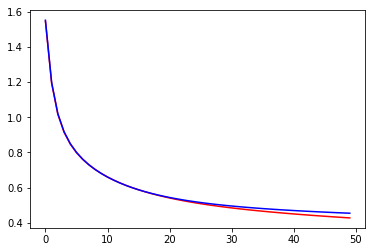

In [18]:
plt.figure(0)
plt.plot(training_loss, color = 'red')
plt.plot(val_loss, color = 'blue')
plt.show()

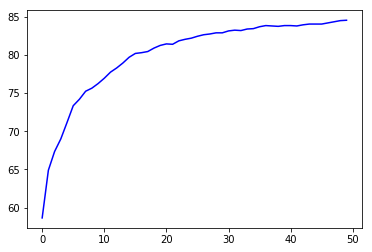

In [15]:
plt.figure(0)
plt.plot(val_acc, color = 'blue')
plt.show()

In [21]:
print(y_train.shape)

(8000,)
